In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

In [2]:
dfmg = pd.read_csv("dfmg_corrected_DIST_IS_GL.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [3]:
dfmg["DIST_min"] = dfmg.loc[:, ["DIST_GLINE", "DIST_ISE"]].min(axis=1)

In [4]:
#import plot_theta_sal
#importlib.reload(plot_theta_sal)

import plot_surfbot_vsTime as pltsurfbot
import plot_topView_contourf as topView

In [5]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

cdw = (dfmg['PSAL_ADJUSTED'] > 34.6) & (dfmg['CTEMP'] > 0)
maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_min'] <= 50
gline_le_100km = dfmg['DIST_min'] <= 100
gline_le_150km = dfmg['DIST_min'] <= 150
gline_le_25km = dfmg['DIST_min'] <= 25
gline_le_75km = dfmg['DIST_min'] <= 75

sel_echodepth = dfmg.ECHODEPTH > -3000

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [6]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [7]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [28]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.5) & (dfmg.CTEMP <= -1.8) & (dfmg.CTEMP >= -1.9)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [102]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

In [9]:
!mkdir ./Images/waterMassBudgets2

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

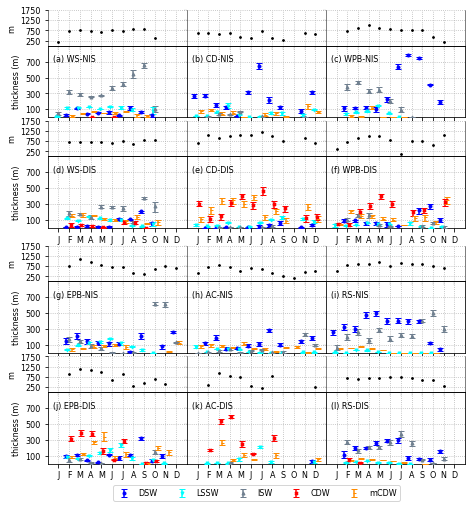

In [103]:
A1 = gline_le_75km & sel_echodepth
A2 = ~gline_le_75km & sel_echodepth

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WS-NIS", "(b) CD-NIS", "(c) WPB-NIS",        
          "(d) WS-DIS", "(e) CD-DIS", "(f) WPB-DIS", 
          "(g) EPB-NIS","(h) AC-NIS", "(i) RS-NIS",
          "(j) EPB-DIS","(k) AC-DIS", "(l) RS-DIS" ] 

yticks = list(np.arange(100, 820, 200))
yticks_dod = list(np.arange(250,2000,500))
wmThk1_20 = pltwmthk.plot_array_waterMassThickness(dfmg,
            regions1, titles1, ht=9, save=True, ymax=900,
            savename="./Images/waterMassBudgets2/array1_20.pdf", 
            yticks=yticks, zbin=20.0, plotter=2,
            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:84: RuntimeWarning: invalid value encountered in true_divide
  DSWthickness[i] = np.nansum((DSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:86: RuntimeWarning: invalid value encountered in true_divide
  lsswthickness[i] = np.nansum((LSSWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:88: RuntimeWarning: invalid value encountered in true_divide
  ISWthickness[i] = np.nansum((ISWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:90: RuntimeWarning: invalid value encountered in true_divide
  CDWthickness[i] = np.nansum((CDWcount / totalcount) * zbin_exact)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:92: RuntimeWarning: invalid value encountered in true_divide
  mCDW

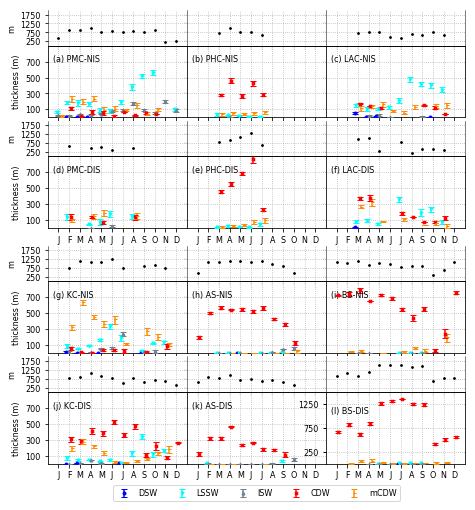

In [104]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMC-NIS", "(b) PHC-NIS", "(c) LAC-NIS", 
           "(d) PMC-DIS", "(e) PHC-DIS", "(f) LAC-DIS",
           "(g) KC-NIS", "(h) AS-NIS", "(i) BS-NIS", 
           "(j) KC-DIS", "(k) AS-DIS", "(l) BS-DIS"]

yticks = list(np.arange(100, 820, 200)) 
yticks_dod = list(np.arange(250,2000,500))
wmThk2_20 = pltwmthk.plot_array_waterMassThickness(dfmg, 
            regions2, titles2, ht=9, save=True, ymax=900, retValue = True, zbin=20.0, plotter=2,
            savename="./Images/waterMassBudgets2/array2_20.pdf", yticks=yticks, 
            yticks_dod=yticks_dod, ymax_dod=2000)

In [105]:
DSWthickness12 = np.append(wmThk1_20[0].ravel(), wmThk2_20[0].ravel())
DSW_CI_12 = list(np.array((list(wmThk1_20[1]) + list(wmThk2_20[1]) )).reshape(288,2))

ISWthickness12 = np.append(wmThk1_20[4].ravel(), wmThk2_20[4].ravel())
ISW_CI_12 = list(np.array(list(wmThk1_20[5]) + list(wmThk2_20[5]) ).reshape(288,2))

lsswthickness12 = np.append(wmThk1_20[2].ravel(), wmThk2_20[2].ravel())
lssw_CI_12 = list(np.array(list(wmThk1_20[3]) + list(wmThk2_20[3]) ).reshape(288,2))

CDWthickness12 = np.append(wmThk1_20[8].ravel(), wmThk2_20[8].ravel())
CDW_CI_12 = list(np.array(list(wmThk1_20[9]) + list(wmThk2_20[9]) ).reshape(288,2))

mCDWthickness12 = np.append(wmThk1_20[6].ravel(), wmThk2_20[6].ravel())
mCDW_CI_12 = list(np.array(list(wmThk1_20[7]) + list(wmThk2_20[7]) ).reshape(288,2))

zlowest12 = np.append(wmThk1_20[-1].ravel(), wmThk2_20[-1].ravel())

titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness_20 = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind),
                                   'DSW_CI':pd.Series(DSW_CI_12, index=ind),
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'ISW_CI':pd.Series(ISW_CI_12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'LSSW_CI':pd.Series(lssw_CI_12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'mCDW_CI':pd.Series(mCDW_CI_12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'CDW_CI':pd.Series(CDW_CI_12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*24, index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

In [13]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

In [14]:
waterMassThickness_20.columns

Index(['DSW', 'DSW_CI', 'ISW', 'ISW_CI', 'LSSW', 'LSSW_CI', 'mCDW', 'mCDW_CI',
       'CDW', 'CDW_CI', 'zlowest', 'month', 'region'],
      dtype='object')

$P(DSW\, |\, noCDW) = \frac{P(DSW\, \cap\, noCDW)}{P(noCDW)}$

In [106]:
import compute_waterMassProbabilities as wmprob
importlib.reload(wmprob)

<module 'compute_waterMassProbabilities' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/compute_waterMassProbabilities.py'>

[0.42666667 0.29411765] [[0.11802469 0.13393939]
 [0.10990712 0.13053989]]


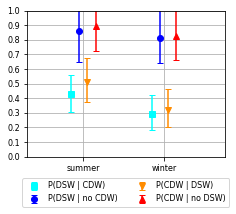

 P(DSW | CDW)= [0.42666667 0.29411765] [[0.30864198 0.56060606]
 [0.18421053 0.42465753]] 
 P(DSW | no CDW)= [0.86111111 0.81132075] [[0.65116279 1.19230769]
 [0.64283049 1.04444444]] 
 P(CDW | DSW)= [0.50793651 0.31746032] [[0.37313433 0.67307692]
 [0.2        0.46428571]] 
 P(CDW | no DSW)= [0.89583333 0.82758621] [[0.72127869 1.15789474]
 [0.66176471 1.04081633]]


In [107]:
prob_DSW_cond_noCDW, prob_DSW_cond_noCDW_CI, \
              prob_DSW_cond_noCDW_yerr = wmprob.compute_prob_unweighted_bootstrapped(waterMassThickness_20, 
                                            save=True, 
                                            savename="./Images/waterMassBudgets2/wmprobUnweighted_20_bootstrapped.pdf")

In [35]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, round(p,4), lo, hi, [lo,hi]

In [36]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            #1-round(pearsonr(df[r], df[c])[1], 4)
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [97]:
calculate_pvalues(waterMassThickness_20.dropna().groupby("region").mean(), retValue="r")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month
DSW,1,0.422324,-0.253313,-0.309303,-0.389296,-0.11459,0.127695
ISW,0.422324,1,0.0822313,-0.216601,-0.445328,-0.124293,0.0140916
LSSW,-0.253313,0.0822313,1,0.328046,-0.411399,-0.305718,0.405688
mCDW,-0.309303,-0.216601,0.328046,1,-0.305415,0.102668,0.118603
CDW,-0.389296,-0.445328,-0.411399,-0.305415,1,0.663146,-0.15076
zlowest,-0.11459,-0.124293,-0.305718,0.102668,0.663146,1,-0.0651625
month,0.127695,0.0140916,0.405688,0.118603,-0.15076,-0.0651625,1


In [98]:
calculate_pvalues(waterMassThickness_20.dropna().groupby("region").mean(), retValue="CI")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month
DSW,"[1.0, 1.0]","[0.0228142584417073, 0.7055247759966141]","[-0.5958250800785346, 0.16716545527764964]","[-0.6336396046143354, 0.10750725477300399]","[-0.6851038606110162, 0.01672704548523141]","[-0.49510021823058353, 0.30280431505737404]","[-0.2906747828891099, 0.5050745233647621]"
ISW,"[0.0228142584417073, 0.7055247759966141]","[1.0, 1.0]","[-0.33218458844161497, 0.4700360455595577]","[-0.5701779073297212, 0.2046796636487862]","[-0.7194755837373957, -0.05111393652314203]","[-0.5024946529198261, 0.2938368206066926]","[-0.39153078795056756, 0.4151284905310468]"
LSSW,"[-0.5958250800785346, 0.16716545527764964]","[-0.33218458844161497, 0.4700360455595577]","[1.0, 1.0]","[-0.08684255602279167, 0.6459611429445414]","[-0.6988211590090214, -0.009594098928117968]","[-0.6312637354371131, 0.11141956378260073]","[0.002739241323307904, 0.695296903123336]"
mCDW,"[-0.6336396046143354, 0.10750725477300399]","[-0.5701779073297212, 0.2046796636487862]","[-0.08684255602279167, 0.6459611429445414]","[1.0, 1.0]","[-0.6310627254110858, 0.11174951117271072]","[-0.3137219851196514, 0.4859389239681436]","[-0.2991039550012694, 0.4981655407319834]"
CDW,"[-0.6851038606110162, 0.01672704548523141]","[-0.7194755837373957, -0.05111393652314203]","[-0.6988211590090214, -0.009594098928117968]","[-0.6310627254110858, 0.11174951117271072]","[1.0, 1.0]","[0.3546119843213483, 0.8414466224174233]","[-0.522387214123313, 0.2689959322921527]"
zlowest,"[-0.49510021823058353, 0.30280431505737404]","[-0.5024946529198261, 0.2938368206066926]","[-0.6312637354371131, 0.11141956378260073]","[-0.3137219851196514, 0.4859389239681436]","[0.3546119843213483, 0.8414466224174233]","[1.0, 1.0]","[-0.45655798135558345, 0.3473651582102184]"
month,"[-0.2906747828891099, 0.5050745233647621]","[-0.39153078795056756, 0.4151284905310468]","[0.002739241323307904, 0.695296903123336]","[-0.2991039550012694, 0.4981655407319834]","[-0.522387214123313, 0.2689959322921527]","[-0.45655798135558345, 0.3473651582102184]","[1.0, 1.0]"


In [39]:
waterMassThickness_20.to_csv("waterMassThickness_20.csv")

In [77]:
waterMassThickness_20.columns

Index(['DSW', 'DSW_CI', 'ISW', 'ISW_CI', 'LSSW', 'LSSW_CI', 'mCDW', 'mCDW_CI',
       'CDW', 'CDW_CI', 'zlowest', 'month', 'region'],
      dtype='object')

In [87]:
dfsel = waterMassThickness_20.region.str.contains("NIS")
waterMassThickness_20.groupby("region").mean().sort_values("CDW").CDW

region
WS-NIS       0.000000
AC-NIS       0.000000
WPB-NIS      0.000000
RS-NIS       0.000000
EPB-NIS      0.000000
CD-NIS       0.000000
RS-DIS       2.015923
KC-NIS       6.782797
WS-DIS       9.056483
PMC-NIS     30.303427
PMC-DIS     65.431312
LAC-NIS     76.493750
EPB-DIS    121.044667
WPB-DIS    142.933561
LAC-DIS    161.145278
CD-DIS     166.781575
AS-DIS     214.754034
AC-DIS     244.883114
KC-DIS     249.367032
PHC-NIS    307.188683
AS-NIS     425.470255
PHC-DIS    507.890216
BS-NIS     591.702454
BS-DIS     914.701059
Name: CDW, dtype: float64

In [80]:
def find_mean_monthlyMean(wmthk, wmtype="mCDW", region="LAC-NIS"):
        selMask = (wmthk.region == region)
        wmErr = np.zeros((12, 2))
        wmErr[:, 0] = np.stack(wmthk.loc[selMask, wmtype+"_CI"].values)[:, 0] - wmthk.loc[selMask, wmtype]
        wmErr[:, 1] = np.stack(wmthk.loc[selMask, wmtype+"_CI"].values)[:, 1] - wmthk.loc[selMask, wmtype]
        
        maxErr = np.max(wmErr, axis=1)
        wmvaluesMean = np.nanmean(wmthk.loc[selMask, wmtype])
        print(np.sqrt(np.nanmean(maxErr**2)), wmvaluesMean)
        

In [90]:
find_mean_monthlyMean(waterMassThickness_20, region="BS-NIS", wmtype="CDW")

35.1670509436609 591.7024543921109
